# Q&A for dataset

## Import libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/global_air_quality_data_10000.csv')
data

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


## Questions


### Dataset Description
- **City**: Name of the city where the data was collected
- **Country**: Name of the country where the data was collected
- **Date**: Date when the data was collected
- **PM2.5**: Concentration of particulate matter less than 2.5 micrometers
- **PM10**: Concentration of particulate matter less than 10 micrometers
- **NO2**: Concentration of nitrogen dioxide
- **SO2**: Concentration of sulfur dioxide
- **CO**: Concentration of carbon monoxide
- **O3**: Concentration of ozone
- **Temperature**: Temperature in degrees Celsius
- **Humidity**: Humidity percentage
- **Wind Speed**: Wind speed in meters per second

### Questions List
1. Which **city** has the **most polluted** level *(base on PM2.5, PM10, O₃)* ?
2. Percentage of the days **Bad Air Quality** vs **Good Air Quality**?
3. What is the difference in **NO2** and **PM2.5** levels between **weekdays** and **weekends**?
4. How many **hazardous days** *(PM2.5 > 100)* are there in each city for **each season**?
5. What is the **correlation between humidity** **and the ratio** of PM2.5 to PM10 in different cities?

## Answers


### 1. Which **city** has the **most polluted** level *(base on PM2.5, PM10, O₃)* ?
- **Meaning:**
    - Identifies the city with the highest air pollution based on key pollutants, highlighting the areas most affected.
    - Helps prioritize efforts to combat pollution in the most critical areas.
- **Benefits:**
    - Aids in formulating targeted pollution reduction strategies.
    - Increases public awareness in highly polluted cities, potentially driving local initiatives for change.



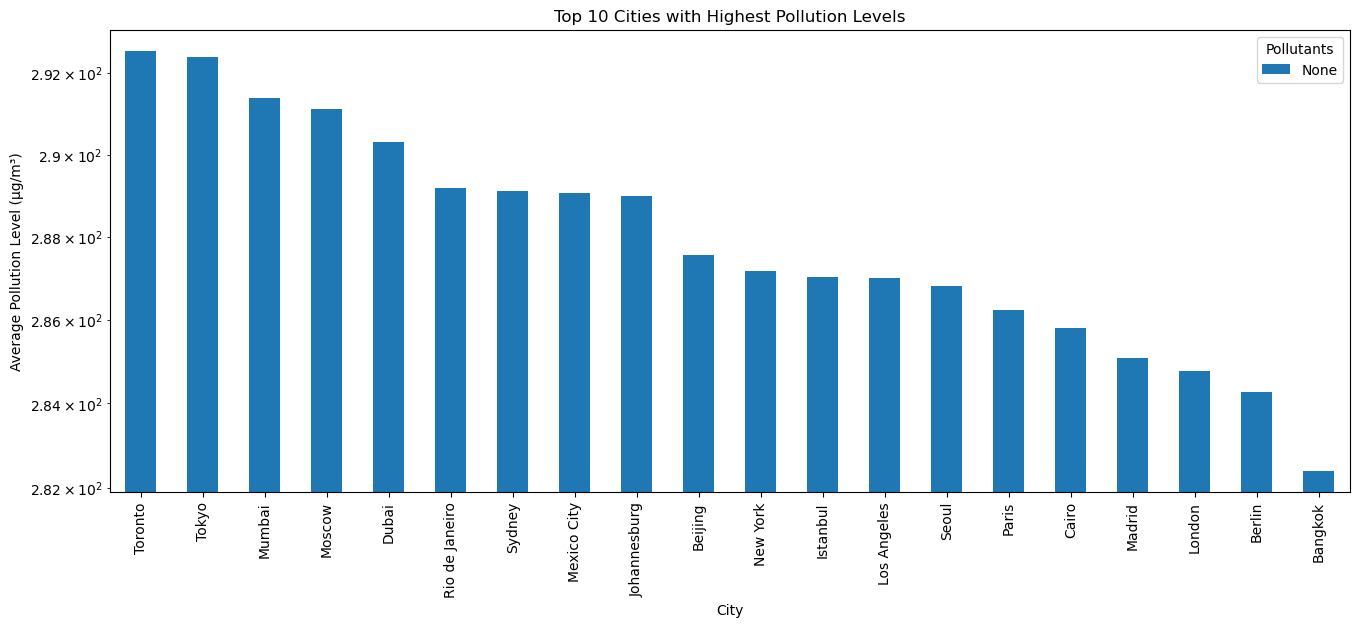

In [21]:

top_10_pollution = data.groupby("City")[["PM2.5", "PM10", "O3"]].mean().sum(axis=1).sort_values(ascending=False)
top_10_pollution.plot(kind="bar", figsize=(16, 6))

plt.xlabel("City")
plt.ylabel("Average Pollution Level (µg/m³)")
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Top 10 Cities with Highest Pollution Levels")
plt.legend(title='Pollutants')
plt.show()


### 2. Percentage of the days Bad Air Quality vs Good Air Quality?
- Meaning:
    - Measures the proportion of days with poor versus acceptable air quality, offering insights into the overall air quality trends in a given area.
    - Evaluates the severity of air pollution over time.
- Benefits:
    - Helps policymakers monitor progress in air quality improvement initiatives.
    - Educates the public about the frequency of hazardous air conditions, encouraging behavior changes or precautionary measures.


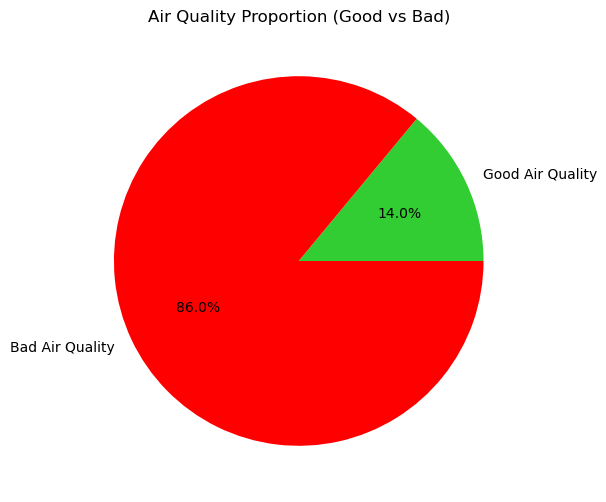

In [22]:
# Assume good air quality is PM2.5 <= 25 µg/m³
good_air = len(data[data['PM2.5'] <= 25])
bad_air = len(data[data['PM2.5'] > 25])
labels = ['Good Air Quality', 'Bad Air Quality']
sizes = [good_air, bad_air]
plt.figure(figsize=(15, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['limegreen', 'red'])
plt.title("Air Quality Proportion (Good vs Bad)")
plt.show()

### 3. What is the difference in NO2 and PM2.5 levels between weekdays and weekends?
- Meaning:
    - Examines variations in pollutant levels between workdays and weekends, often reflecting human activity patterns (e.g., traffic, industrial output).
- Benefits:
    - Helps assess the impact of human activity on air pollution.
    - Provides insights for policy interventions, such as traffic restrictions or industrial regulation during peak times.



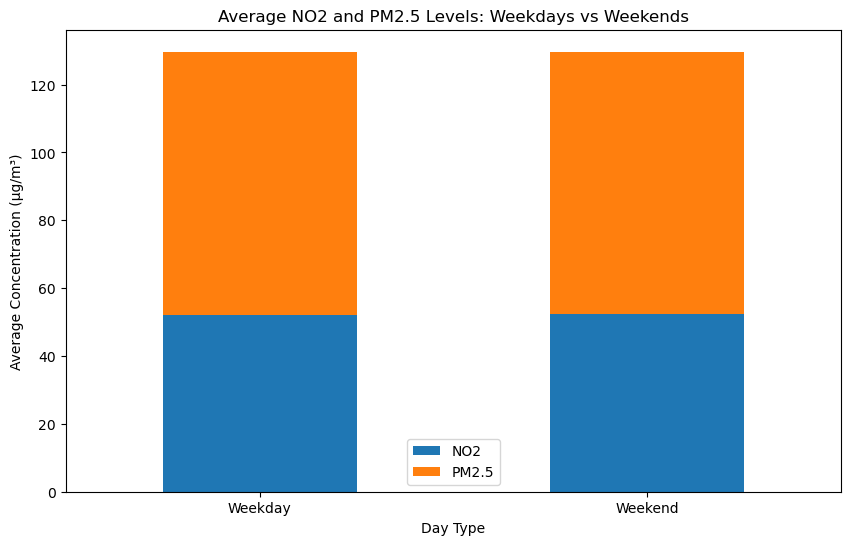

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

data['DayType'] = data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

mean_levels = data.groupby('DayType')[['NO2', 'PM2.5']].mean()
mean_levels.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Average NO2 and PM2.5 Levels: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=0)
plt.show()


### 4. How many hazardous days (PM2.5 > 100) are there in each city for each season?
- Meaning:
    - Analyzes the number of days with extreme pollution (hazardous levels) per season, providing a seasonal perspective on air quality.
- Benefits:
    - Enables seasonal planning for pollution mitigation measures (e.g., restrictions during winter when pollution may spike).
    - Identifies patterns in air quality degradation tied to weather conditions.



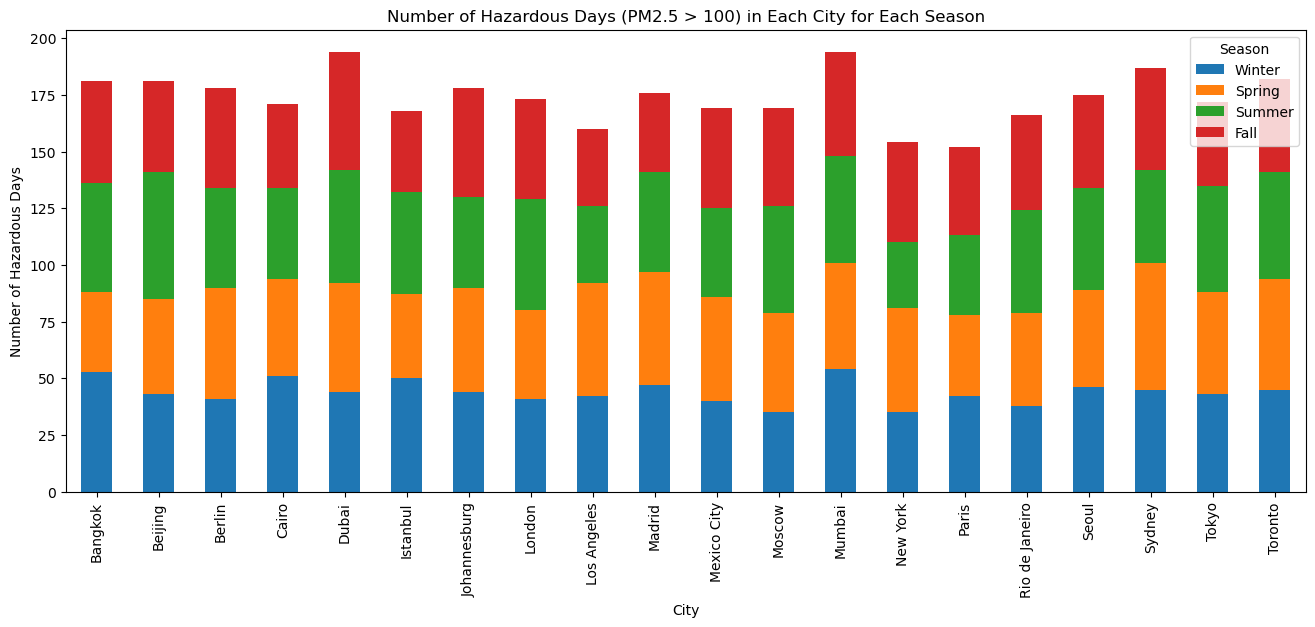

In [24]:
data['season'] = pd.to_datetime(data['Date']).dt.month % 12 // 3 + 1
hazardous_days = (
    data[data['PM2.5'] > 100]
    .groupby(['City', 'season'])
    .size()
    .reset_index(name='hazardous_days')
)

hazardous_days_pivot = hazardous_days.pivot(index='City', columns='season', values='hazardous_days').fillna(0)
hazardous_days_pivot.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Number of Hazardous Days (PM2.5 > 100) in Each City for Each Season')
plt.xlabel('City')
plt.ylabel('Number of Hazardous Days')
plt.legend(title='Season', labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.xticks(rotation=90)
plt.show()

### 5. What is the correlation between humidity and the ratio of PM2.5 to PM10 in different cities?
- Meaning:
    - Investigates the relationship between humidity and particulate matter ratios, revealing how weather influences pollution levels.
- Benefits:
    - Provides scientific insights into environmental interactions affecting air quality.
    - Helps improve predictive models for air pollution levels based on weather conditions, aiding public health advisories.

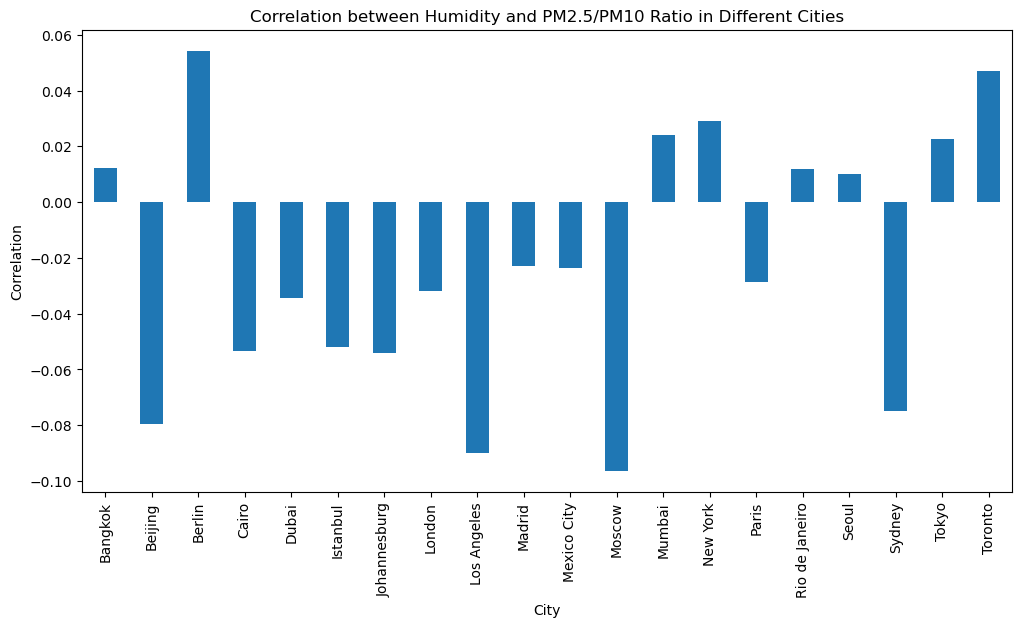

In [25]:
data['PM2.5_to_PM10'] = data['PM2.5'] / data['PM10']

correlation_by_city = data.groupby('City').apply(lambda x: x['Humidity'].corr(x['PM2.5_to_PM10']))

correlation_by_city.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation between Humidity and PM2.5/PM10 Ratio in Different Cities')
plt.xlabel('City')
plt.ylabel('Correlation')
plt.show()